# Import des librairies

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import words
from wordcloud import WordCloud
import re
from plot_keras_history import show_history, plot_history

# Chargement et exploration des données

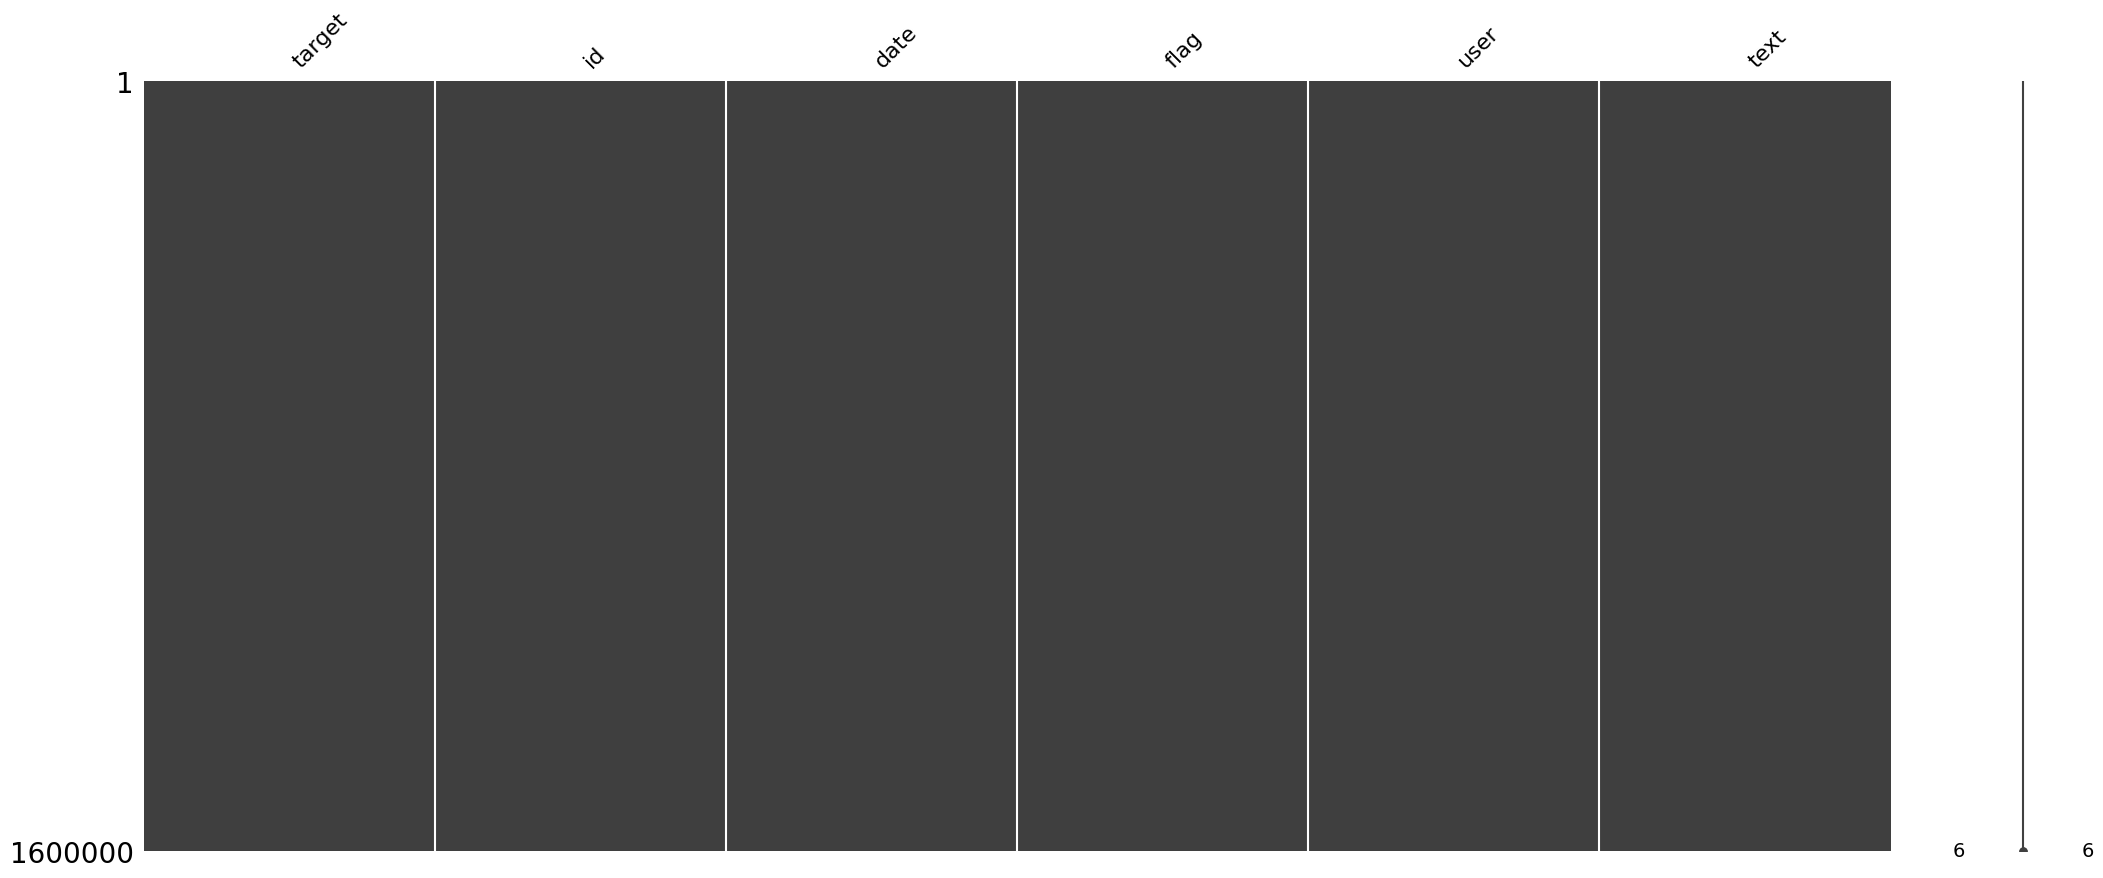

Les dimensions du tableau : 1600000 lignes et 6 colonnes
Nombre de doublons dans le jeu de données : 0
Pourcentage global de valeurs manquantes dans le jeu de données : 0.00%
Nombre de colonnes complètement vides : 0


In [2]:
def charger_donnees():
    chemin_fichier = './data/training.1600000.processed.noemoticon.csv'
    df = pd.read_csv(chemin_fichier, sep=',', encoding='ISO-8859-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])
    # Visualisation des valeurs manquantes avec msno
    msno.matrix(df)
    plt.show()
    # Afficher les dimensions
    print(f"Les dimensions du tableau : {df.shape[0]} lignes et {df.shape[1]} colonnes")
    # Afficher le nombre de doublons
    num_duplicates = df.duplicated().sum()
    print(f"Nombre de doublons dans le jeu de données : {num_duplicates}")
    # Afficher le pourcentage global de valeurs manquantes
    global_missing_percentage = (df.isnull().mean().mean()) * 100
    print(f'Pourcentage global de valeurs manquantes dans le jeu de données : {global_missing_percentage:.2f}%')
    # Afficher le nombre de colonnes complètement vides
    empty_columns = df.columns[df.isnull().all()]
    num_empty_columns = len(empty_columns)
    print(f"Nombre de colonnes complètement vides : {num_empty_columns}")
    return df
df = charger_donnees()

In [3]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
df.sample(10)

,target,id,date,flag,user,text
950177,4,1823922327,Sat May 16 23:25:43 PDT 2009,NO_QUERY,fashionanbeauty,Hours later and I'm still here
1269060,4,2000153083,Mon Jun 01 21:31:03 PDT 2009,NO_QUERY,zoeyjordan,"@LindaJosey pretty as you are, why mess with p..."
2777,0,1468448817,Tue Apr 07 01:44:10 PDT 2009,NO_QUERY,SH1974,When will i finally get over this cold?
397869,0,2056742602,Sat Jun 06 11:42:35 PDT 2009,NO_QUERY,DreLynnDesign,This is gettn ridiculous... Just got 2 more sp...
223625,0,1977245833,Sat May 30 20:28:58 PDT 2009,NO_QUERY,TheMacMommy,@phillymac LOL I'm older than 29 too (34) Jus...
1059734,4,1963287328,Fri May 29 12:29:47 PDT 2009,NO_QUERY,SaraRenatus,is playing WOW.
1113740,4,1972650071,Sat May 30 09:37:30 PDT 2009,NO_QUERY,TheFunkindelics,just recorded some heavy guitar work
767918,0,2300741468,Tue Jun 23 14:32:02 PDT 2009,NO_QUERY,3girlzmom,"@secondpower you passed, heading to Milwaukee,..."
1427030,4,2059316948,Sat Jun 06 16:41:16 PDT 2009,NO_QUERY,shanajaca,@tomsgal Just kidding but please do sniff him ...
1439612,4,2061538778,Sat Jun 06 21:04:47 PDT 2009,NO_QUERY,rgesthuizen,@loisath laptop in backpack


Par soucis de compréhension, je remplace les target égale à 4 par des tragets égale à 1.  

In [6]:
df["target"] = df["target"].replace(4, 1)

In [7]:
df["target"].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

La variable target est équilibrée.  

Le nombre moyen de mots par tweet est 13.18


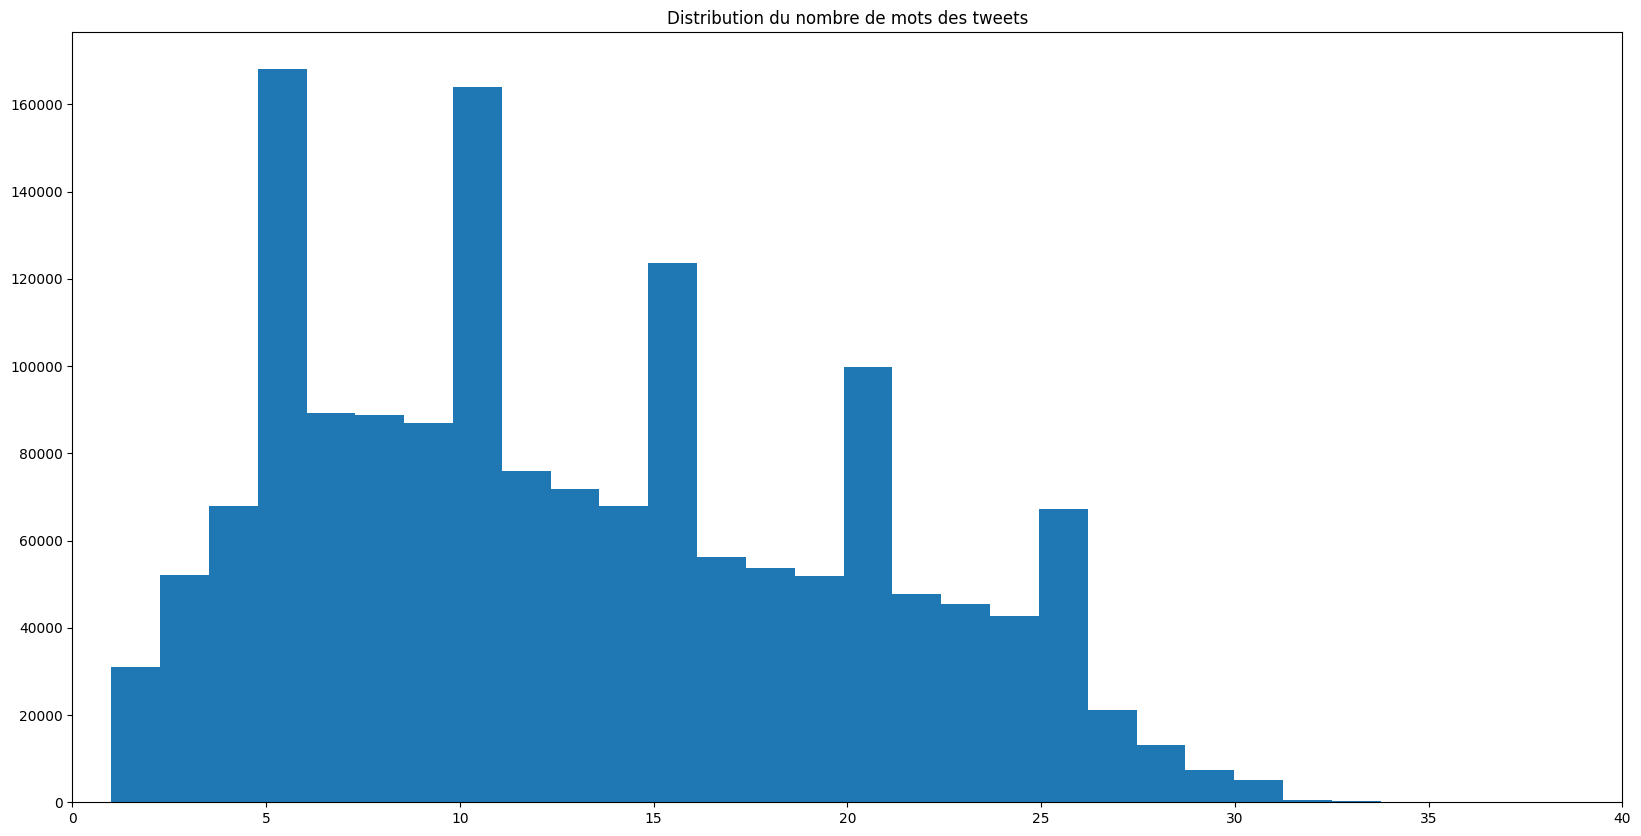

In [8]:
import matplotlib.pyplot as plt

# Calculer le nombre de mots dans chaque tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Calculer le nombre moyen de mots
average_word_count = df['word_count'].mean()

print(f"Le nombre moyen de mots par tweet est {average_word_count:.2f}")

# Visualiser la distribution du nombre de mots
plt.figure(figsize=(20,10))
plt.hist(df['word_count'].values, bins=50)
plt.title("Distribution du nombre de mots des tweets")
plt.xlim(0, 40)  # Définir les limites de l'axe des x de 0 à 40
plt.show()


In [9]:
df['word_count'].describe()

count    1.600000e+06
mean     1.317615e+01
std      6.957978e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: word_count, dtype: float64

# Nettoyage des données

In [10]:
def drop_columns(df):
    """
    Supprime toutes les colonnes sauf 'target' et 'text'.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame modifié.
    """
    df = df[['target', 'text']]
    return df

def drop_text_duplicate(df):
    """
    Supprime les tweets en double.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame sans doublons.
    """
    initial_len = len(df)
    df = df.drop_duplicates(subset="text")
    final_len = len(df)
    print(f"Nombre de tweets en double supprimés : {initial_len - final_len}")
    return df

def filter_tweet(df):
    """
    Filtre et supprime les tweets non informatifs et affiche les premières lignes supprimées.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame filtré.
    """
    initial_len = len(df)
    df['text'] = df['text'].str.strip()
    filtered_df = df[df['text'].str.match('^(@\w+\s*)+$')]
    df = df.drop(filtered_df.index, axis= 0)
    final_len = len(df)
    display(filtered_df.head(20))
    print(f"Nombre de tweets non informatif supprimés : {initial_len - final_len}")
    return df

def drop_single_token_tweets(df):
    """
    Supprime les tweets avec un seul token.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame modifié.
    """
    initial_len = len(df)
    df['tokens'] = df['text'].str.split()
    df = df[df['tokens'].str.len() > 1]
    final_len = len(df)
    print(f"Nombre de tweets avec un seul token supprimés : {initial_len - final_len}")
    return df

def remove_at_mentions(df):
    """
    Supprime les mots qui commencent par @.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame modifié.
    """
    df['text'] = df['text'].apply(lambda x: ' '.join(re.sub(r"(@[A-Za-z0-9]+)","",x).split()))
    return df

def remove_urls(df):
    """
    Supprime les adresses de site internet.
    Args:
        df (pd.DataFrame): DataFrame contenant les données des tweets.
    Return:
        pd.DataFrame: DataFrame modifié.
    """
    df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www.\S+", "", x))
    return df


df = drop_columns(df)
df = drop_text_duplicate(df)
df = filter_tweet(df)
df = drop_single_token_tweets(df)
df = remove_at_mentions(df)
df = remove_urls(df)
df = df.reset_index(drop=True)

Nombre de tweets en double supprimés : 18534


,target,text
208,0,@mandayyy
249,0,@mandayyy
398,0,@danadearmond
430,0,@anistorm
1011,0,@citizensheep
1014,0,@GirlsGoneChild
1231,0,@thecoolestout
1421,0,@marlonjenglish
1486,0,@oishiieats
1641,0,@thisisguan


Nombre de tweets non informatif supprimés : 2552
Nombre de tweets avec un seul token supprimés : 2036


In [11]:
df.shape

(1576878, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576878 entries, 0 to 1576877
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1576878 non-null  int64 
 1   text    1576878 non-null  object
 2   tokens  1576878 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.1+ MB


In [13]:
df.head()

,target,text,tokens
0,0,"- Awww, that's a bummer. You shoulda got Davi...","[@switchfoot, http://twitpic.com/2y1zl, -, Aww..."
1,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, can't, update, his, Face..."
2,0,I dived many times for the ball. Managed to sa...,"[@Kenichan, I, dived, many, times, for, the, b..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,"no, it's not behaving at all. i'm mad. why am ...","[@nationwideclass, no,, it's, not, behaving, a..."


# Prétraitement Texte

In [14]:
# Télchargement des listes nécessaire au prétraitement
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pierr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
def display_tokens_info(tokens):
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

def process_text(doc,
                rejoin=False,
                lemm_or_stemm="stem",
                list_rare_words=None,
                min_len_word=0,
                force_is_alpha=True,
                eng_words=None,
                remove_words=None,
                include_stopwords=True,
                lowercase=True):

    # list_unique_words
    if not list_rare_words:
        list_rare_words = []

    # lower
    if lowercase:
        doc = doc.lower().strip()
    else:
        doc = doc.strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    stop_words = set(stopwords.words('english'))
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # include stopwords if specified
    if include_stopwords:
        cleaned_tokens_list += [w for w in raw_tokens_list if w in stop_words]

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # remove additional words
    if remove_words:
        non_rare_tokens = [w for w in non_rare_tokens if w not in remove_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N

    # Stem or lem
    if lemm_or_stemm == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]

    # in english
    if eng_words:
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text

    # manage return type
    if rejoin:
        return " ".join(engl_text)

    return engl_text


In [17]:
raw_corpus = " ".join(df.text.values)
raw_corpus[:1000]

" - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah! I dived many times for the ball. Managed to save 50% The rest go out of bounds my whole body feels itchy and like its on fire no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. not the whole crew Need a hug hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ? _K nope they didn't have it que me muera ? spring break in plain city... it's snowing I just re-pierced my ears I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . . It it counts, idk why I did either. you never talk to me anymore i would've been the first, but i didn't have a gun. not really though, zac snyder's just a doucheclown. I wish I got to watch it with you!! I miss you and how was the premiere?! Hollis' death scene will hurt me s

In [18]:
len(raw_corpus)

106548687

In [19]:
tokenizer = RegexpTokenizer(r"\w+")
raw_tokens_list = tokenizer.tokenize(raw_corpus)

In [20]:
tmp = pd.Series(raw_tokens_list).value_counts()
tmp.head()

I      651353
to     554239
the    488478
a      371350
i      298701
Name: count, dtype: int64

In [21]:
display_tokens_info(raw_tokens_list)

nb tokens 20956665, nb tokens uniques 396995
['Awww', 'that', 's', 'a', 'bummer', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', 'D', 'is', 'upset', 'that', 'he', 'can', 't', 'update', 'his', 'Facebook', 'by', 'texting', 'it', 'and']


In [22]:
tmp.describe()

count    396995.000000
mean         52.788234
std        2349.024198
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      651353.000000
Name: count, dtype: float64

In [23]:
corpus = process_text(raw_corpus,
                      rejoin=False,
                      lemm_or_stemm = "lem")
display_tokens_info(corpus)

nb tokens 20552824, nb tokens uniques 252634
['awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day', 'upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah', 'dived', 'many', 'time', 'ball', 'managed', 'save', 'rest', 'go', 'bound', 'whole', 'body']


In [24]:
tmp = pd.Series(corpus).value_counts()
tmp.head()

i      950202
to     561713
the    521112
a      424975
it     347723
Name: count, dtype: int64

In [25]:
# Les tokens les moins présents
tmp.tail()

corseted        1
herâ            1
contemplates    1
langara         1
carlberg        1
Name: count, dtype: int64

In [26]:
tmp.describe()

count    252634.000000
mean         81.354149
std        3377.348179
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      950202.000000
Name: count, dtype: float64

In [27]:
tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words = list(list_unique_words.index)
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("C:/Users/pierr/Projet7/list_unique_words.csv", index=False)

In [28]:
tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp<=5]
list_min_5_words = list(list_min_5_words.index)
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv("C:/Users/pierr/Projet7/list_min_5_words.csv", index=False)

In [29]:
df_positifs = df[df['target'] == 0].sample(n=10000, random_state=42)
df_negatifs = df[df['target'] == 1].sample(n=10000, random_state=42)

# Concaténer les deux dataframes
df_model = pd.concat([df_positifs, df_negatifs])

# Mélanger les données
df_model = df_model.sample(frac=1, random_state=1).reset_index(drop=True)

In [30]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  int64 
 1   text    20000 non-null  object
 2   tokens  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [31]:
df_model['text_filter_lem'] = df_model['text'].apply(lambda x : process_text(x,
                                                             rejoin=True,
                                                            lemm_or_stemm="lem",
                                                            force_is_alpha=True,
                                                            include_stopwords=True))

df_model['text_filter_stem'] = df_model['text'].apply(lambda x : process_text(x,
                                                             rejoin=True,
                                                            lemm_or_stemm="stem",
                                                            force_is_alpha=True,
                                                            include_stopwords=True))

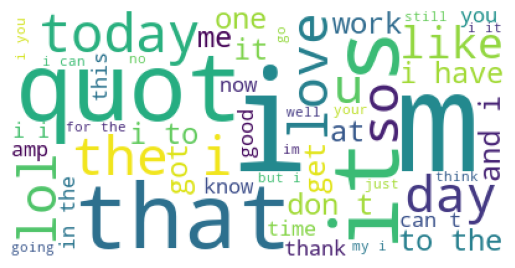

In [32]:
wordcloud = WordCloud (background_color = 'white',
                       stopwords=[],
                       max_words=50).generate(" ".join(df_model['text_filter_lem']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

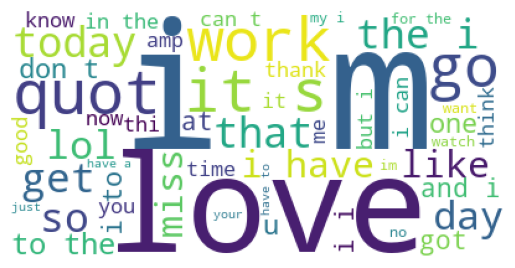

In [33]:
wordcloud = WordCloud (background_color = 'white',
                       stopwords=[],
                       max_words=50).generate(" ".join(df_model['text_filter_stem']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

file_path = 'C:/Users/pierr/Projet7/df_Test2.csv'
df_model.to_csv(file_path, index=False)

chemin_fichier = 'C:/Users/pierr/Projet7/df_Test2.csv'
df_model = pd.read_csv(chemin_fichier)

In [34]:
df_model.head()

,target,text,tokens,text_filter_lem,text_filter_stem
0,1,Can you follow me??????? Please...x],"[@IamJoeBeastmode, Can, you, follow, me???????...",follow please x can you me,follow pleas x can you me
1,1,Hi David i love you so much.i cann't stop list...,"[@DavidArchie, Hi, David, i, love, you, so, mu...",hi david love much cann stop listening song i ...,hi david love much cann stop listen song i you...
2,0,I'm a Dees man through and through and they we...,"[@aflonline, I'm, a, Dees, man, through, and, ...",dees man disgraceful last week bored watching ...,dee man disgrac last week bore watch bore hell...
3,1,"No, I live far away from there.. I've never be...","[@gabizza, No,, I, live, far, away, from, ther...",live far away never either lol south korea cou...,live far away never either lol south korea cou...
4,0,hiya! I know how you feel What you up to?,"[@stripysocks123, hiya!, I, know, how, you, fe...",hiya know feel i how you what you up to,hiya know feel i how you what you up to


In [35]:
df_model.sample(10)

,target,text,tokens,text_filter_lem,text_filter_stem
4621,1,"i'm up, sarah must ave left early cos she's of...","[i'm, up,, sarah, must, ave, left, early, cos,...",sarah must ave left early co running freak lun...,sarah must ave left earli co run freak lunch a...
13565,1,Thanks! I love 2 cents,"[@silver4fire, Thanks!, I, love, 2, cents]",thanks love cent i,thank love cent i
13192,1,Wow gotcha and best friends awesome. Well done...,"[Wow, gotcha, and, best, friends, awesome., We...",wow gotcha best friend awesome well done resul...,wow gotcha best friend awesom well done result...
2486,0,just had fab southern lunch at Arnold's with m...,"[just, had, fab, southern, lunch, at, Arnold's...",fab southern lunch arnold friend clem briefly ...,fab southern lunch arnold friend clem briefli ...
9523,0,someone help me?,"[someone, help, me?]",someone help me,someon help me
13704,0,when i was eight years old i had really long h...,"[@KimKardashian, when, i, was, eight, years, o...",eight year old really long hair gramma cut sho...,eight year old realli long hair gramma cut sho...
10573,1,it's a very lovely thing.,"[@Kpedeaux, it's, a, very, lovely, thing.]",lovely thing it s a very,love thing it s a veri
16531,0,i didnt like them im a hater,"[@kristianava, i, didnt, like, them, im, a, ha...",didnt like im hater i them a,didnt like im hater i them a
13465,1,"listening to hollywoods not america by ferras,...","[listening, to, hollywoods, not, america, by, ...",listening hollywood america ferras new favorit...,listen hollywood america ferra new favorit son...
7521,1,finally caught myself a male pikachu. he is so...,"[finally, caught, myself, a, male, pikachu., h...",finally caught male pikachu cute myself a he i...,final caught male pikachu cute myself a he is so


In [36]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            20000 non-null  int64 
 1   text              20000 non-null  object
 2   tokens            20000 non-null  object
 3   text_filter_lem   20000 non-null  object
 4   text_filter_stem  20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


# Comparaison pré traitement

## Sans prétraitement

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Séparation des données en ensembles d'entraînement, de test et de validation
X_train, X_temp, y_train, y_temp = train_test_split(df_model['text'], df_model['target'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorisation des tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Prédiction et évaluation du modèle sur l'ensemble de validation
y_val_pred = model.predict(X_val_vec)
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val, y_val_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
specificity_val = tn / (tn+fp)

print(f'Validation Accuracy: {accuracy_val}')
print(f'Validation Recall: {recall_val}')
print(f'Validation F1 Score: {f1_val}')
print(f'Validation AUC: {auc_val}')
print(f'Validation Specificity: {specificity_val}')

# Prédiction et évaluation du modèle sur l'ensemble de test
y_test_pred = model.predict(X_test_vec)
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity_test = tn / (tn+fp)

print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')
print(f'Test AUC: {auc_test}')
print(f'Test Specificity: {specificity_test}')



Validation Accuracy: 0.7615
Validation Recall: 0.7615
Validation F1 Score: 0.761569985633158
Validation AUC: 0.7615991292078856
Validation Specificity: 0.7589199614271939
Test Accuracy: 0.744
Test Recall: 0.744
Test F1 Score: 0.7439774610911681
Test AUC: 0.7438450057818733
Test Specificity: 0.7352342158859471


## Prétraitement stemmer

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Séparation des données en ensembles d'entraînement, de test et de validation
X_train, X_temp, y_train, y_temp = train_test_split(df_model['text_filter_stem'], df_model['target'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorisation des tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Prédiction et évaluation du modèle sur l'ensemble de validation
y_val_pred = model.predict(X_val_vec)
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val, y_val_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
specificity_val = tn / (tn+fp)

print(f'Validation Accuracy: {accuracy_val}')
print(f'Validation Recall: {recall_val}')
print(f'Validation F1 Score: {f1_val}')
print(f'Validation AUC: {auc_val}')
print(f'Validation Specificity: {specificity_val}')

# Prédiction et évaluation du modèle sur l'ensemble de test
y_test_pred = model.predict(X_test_vec)
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity_test = tn / (tn+fp)

print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')
print(f'Test AUC: {auc_test}')
print(f'Test Specificity: {specificity_test}')

Validation Accuracy: 0.768
Validation Recall: 0.768
Validation F1 Score: 0.7680663968842938
Validation AUC: 0.7680895145454127
Validation Specificity: 0.7656702025072324
Test Accuracy: 0.7415
Test Recall: 0.7415
Test F1 Score: 0.7414805388790969
Test AUC: 0.7413531984362932
Test Specificity: 0.7331975560081466


## Prétraitement Lemmatizer

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Séparation des données en ensembles d'entraînement, de test et de validation
X_train, X_temp, y_train, y_temp = train_test_split(df_model['text_filter_lem'], df_model['target'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorisation des tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Prédiction et évaluation du modèle sur l'ensemble de validation
y_val_pred = model.predict(X_val_vec)
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val, y_val_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
specificity_val = tn / (tn+fp)

print(f'Validation Accuracy: {accuracy_val}')
print(f'Validation Recall: {recall_val}')
print(f'Validation F1 Score: {f1_val}')
print(f'Validation AUC: {auc_val}')
print(f'Validation Specificity: {specificity_val}')

# Prédiction et évaluation du modèle sur l'ensemble de test
y_test_pred = model.predict(X_test_vec)
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity_test = tn / (tn+fp)

print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')
print(f'Test AUC: {auc_test}')
print(f'Test Specificity: {specificity_test}')

Validation Accuracy: 0.7685
Validation Recall: 0.7685
Validation F1 Score: 0.7685605251471425
Validation AUC: 0.7685346239001193
Validation Specificity: 0.7675988428158148
Test Accuracy: 0.7435
Test Recall: 0.7435
Test F1 Score: 0.7434509124558244
Test AUC: 0.7432818233107527
Test Specificity: 0.7311608961303462


# Comparaison des modèle avec ML Flow

In [40]:
def train_and_log_model(run_name, model, X_train_vec, y_train, X_val_vec, y_val):
    import mlflow
    import mlflow.sklearn
    from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

    model_name = type(model).__name__

    # Initialisation d'un run avec le nom donné
    with mlflow.start_run(run_name=run_name):
        # Entraînement du modèle
        model.fit(X_train_vec, y_train)

        # Prédiction et évaluation du modèle sur l'ensemble de validation
        y_val_pred = model.predict(X_val_vec)
        accuracy_val = accuracy_score(y_val, y_val_pred)
        recall_val = recall_score(y_val, y_val_pred, average='weighted')
        f1_val = f1_score(y_val, y_val_pred, average='weighted')
        auc_val = roc_auc_score(y_val, y_val_pred)
        tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
        specificity_val = tn / (tn+fp)

        # Enregistrement des paramètres et des métriques dans MLflow
        mlflow.log_param("model", model_name)
        mlflow.log_metric("accuracy_val", accuracy_val)
        mlflow.log_metric("recall_val", recall_val)
        mlflow.log_metric("f1_val", f1_val)
        mlflow.log_metric("auc_val", auc_val)
        mlflow.log_metric("specificity_val", specificity_val)

        # Enregistrement du modèle dans MLflow
        mlflow.sklearn.log_model(model, model_name)
        mlflow.end_run()

In [41]:
# Séparation des données en ensembles d'entraînement, de test et de validation
X_train, X_temp, y_train, y_temp = train_test_split(df_model['text'], df_model['target'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Vectorisation des tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier

train_and_log_model("LinearRegression", LogisticRegression(), X_train_vec, y_train, X_val_vec, y_val)
train_and_log_model("RandomForest", RandomForestClassifier(), X_train_vec, y_train, X_val_vec, y_val)
train_and_log_model("XGBoost", XGBClassifier(), X_train_vec, y_train, X_val_vec, y_val)

C:\Users\pierr\anaconda3\envs\Pro7\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6391 - loss: 0.6292
Epoch 1: val_loss improved from inf to 0.51580, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6394 - loss: 0.6290 - val_accuracy: 0.7412 - val_loss: 0.5158
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8059 - loss: 0.4371
Epoch 2: val_loss improved from 0.51580 to 0.50334, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8059 - loss: 0.4371 - val_accuracy: 0.7540 - val_loss: 0.5033
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8362 - loss: 0.3802
Epoch 3: val_loss did not improve from 0.50334
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8361 - loss: 0.3803 - val_accuracy: 0.7542 - val_loss: 0.5179
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8550 - loss: 0.3442
Epoch 4: val_loss did n

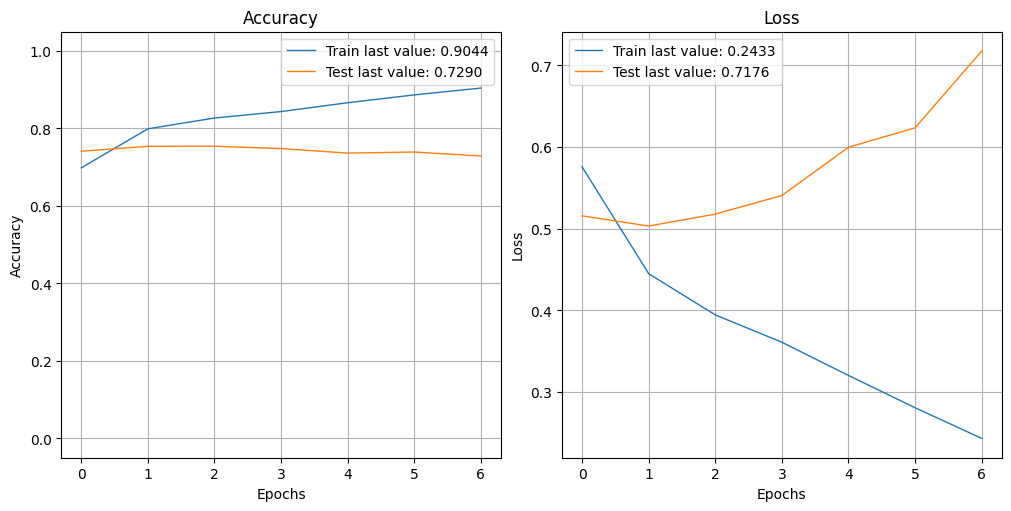

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_model['text'], df_model['target'], test_size=0.2, random_state=42)

# Tokenisation et padding des tweets
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Création du modèle
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Création du callback
model_save_path = 'C:/Users/pierr/Projet7/model_best_weights.keras'
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraînement du modèle
history = model.fit(X_train_pad, y_train, epochs=50, batch_size=64, callbacks=callbacks_list, validation_data=(X_test_pad, y_test), verbose=1)

# Score du dernier epoch
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

# Score de l'epoch optimal
model.load_weights(model_save_path)
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

# Prédiction et évaluation du modèle
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()


Epoch 1/50
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6327 - loss: 0.6323
Epoch 1: val_loss improved from inf to 0.51577, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6338 - loss: 0.6314 - val_accuracy: 0.7525 - val_loss: 0.5158
Epoch 2/50
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7987 - loss: 0.4456
Epoch 2: val_loss improved from 0.51577 to 0.50768, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7987 - loss: 0.4457 - val_accuracy: 0.7538 - val_loss: 0.5077
Epoch 3/50
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8293 - loss: 0.3929
Epoch 3: val_loss did not improve from 0.50768
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8292 - loss: 0.3930 - val_accuracy: 0.7498 - val_loss: 0.5448
Epoch 4/50
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8550 - loss: 0.3547
Epoch 4: val_loss did n

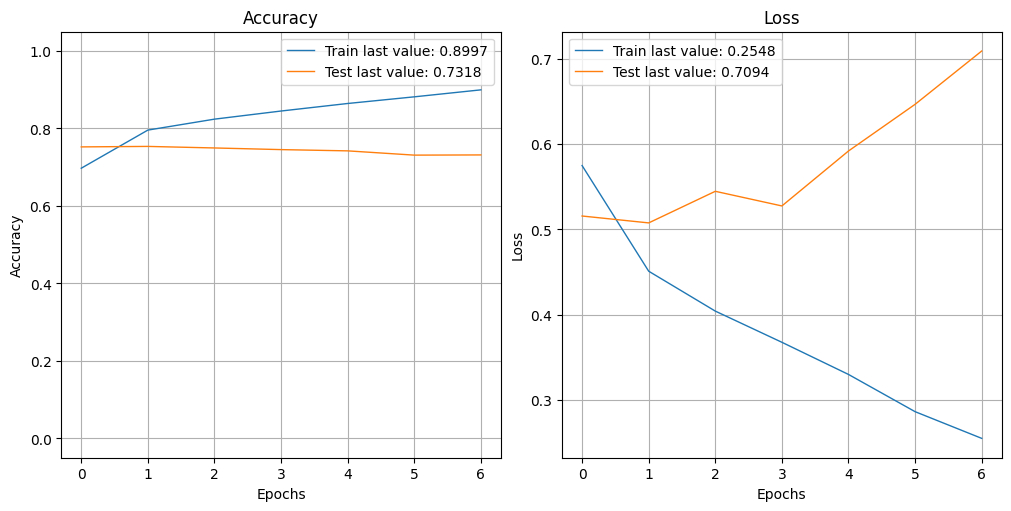

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_model['text_filter_stem'], df_model['target'], test_size=0.2, random_state=42)

# Tokenisation et padding des tweets
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Création du modèle
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Création du callback
model_save_path = 'C:/Users/pierr/Projet7/model_best_weights.keras'
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraînement du modèle
history = model.fit(X_train_pad, y_train, epochs=50, batch_size=64, callbacks=callbacks_list, validation_data=(X_test_pad, y_test), verbose=1)

# Score du dernier epoch
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

# Score de l'epoch optimal
model.load_weights(model_save_path)
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

# Prédiction et évaluation du modèle
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()


Epoch 1/50
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6230 - loss: 0.6370
Epoch 1: val_loss improved from inf to 0.52263, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6238 - loss: 0.6364 - val_accuracy: 0.7420 - val_loss: 0.5226
Epoch 2/50
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7923 - loss: 0.4511
Epoch 2: val_loss improved from 0.52263 to 0.51150, saving model to C:/Users/pierr/Projet7/model_best_weights.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7923 - loss: 0.4511 - val_accuracy: 0.7570 - val_loss: 0.5115
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8288 - loss: 0.3932
Epoch 3: val_loss did not improve from 0.51150
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8287 - loss: 0.3932 - val_accuracy: 0.7502 - val_loss: 0.5228
Epoch 4/50
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8589 - loss: 0.3425
Epoch 4: val_loss did n

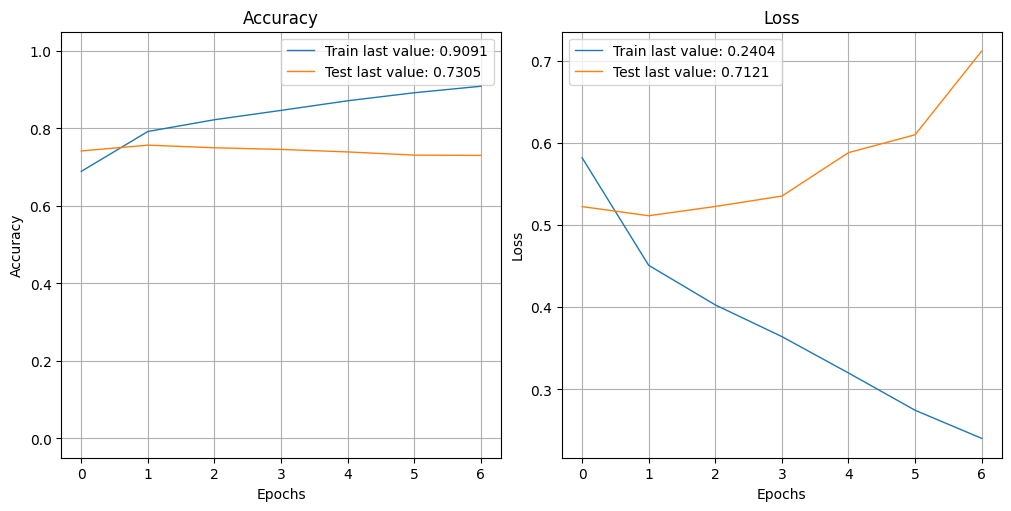

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_model['text_filter_lem'], df_model['target'], test_size=0.2, random_state=42)

# Tokenisation et padding des tweets
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Création du modèle
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Création du callback
model_save_path = 'C:/Users/pierr/Projet7/model_best_weights.keras'
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraînement du modèle
history = model.fit(X_train_pad, y_train, epochs=50, batch_size=64, callbacks=callbacks_list, validation_data=(X_test_pad, y_test), verbose=1)

# Score du dernier epoch
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

# Score de l'epoch optimal
model.load_weights(model_save_path)
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

# Prédiction et évaluation du modèle
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()
